Column
    [0] Row
        [0] Column
            [0] PNG(str, height=50)
        [1] Markdown(str)
    [1] Row
        [0] Column
            [0] Row
                [0] Column
                    [0] Markdown(str)
                    [1] Select(options=['evspsbl', 'evspsblpot', ...], value='evspsbl', width=450)
            [1] Row
                [0] Column
                    [0] Markdown(str)
                    [1] DiscreteSlider(options=['1981-2010', ...], value='1981-2010', width=175)
                [1] Column
                    [0] Markdown(str)
                    [1] RadioButtonGroup(options=['rcp45', 'rcp85', 'ref'], value='rcp45', width=225)
            [2] Row
                [0] Markdown(str)
                [1] Checkbox()
        [1] Column
            [0] Column
                [0] Markdown(str)
                [1] FloatInput(end=-11.0, name='Longitude', start=-17.5, width=100)
            [1] FloatInput(end=14.5, name='Latitude', start=12.0, width=100)
            [2] Button(name='png', width=70)
    [2] Tabs(dynamic=True)
        [0] Column
            [0] Row
                [0] Matplotlib(Figure)
            [1] Row
                [0] Column
                    [0] Markdown(str)
                    [1] Button(name='png', width=70)
                [1] Spacer(width=50)
        [1] Column
            [0] Row
                [0] Column
                    [0] Markdown(str)
                    [1] Button(name='png', width=70)
                [1] Spacer(width=50)
        [2] Column
            [0] Row
                [0] Column
                    [0] Markdown(str)
                    [1] Column
                        [0] Column()
                        [1] Row
                            [0] Str(None, name='interactive00302')
                [1] Spacer(width=50)
        [3] Column(width=1200)
            [0] Markdown(str)
            [1] Markdown(str)
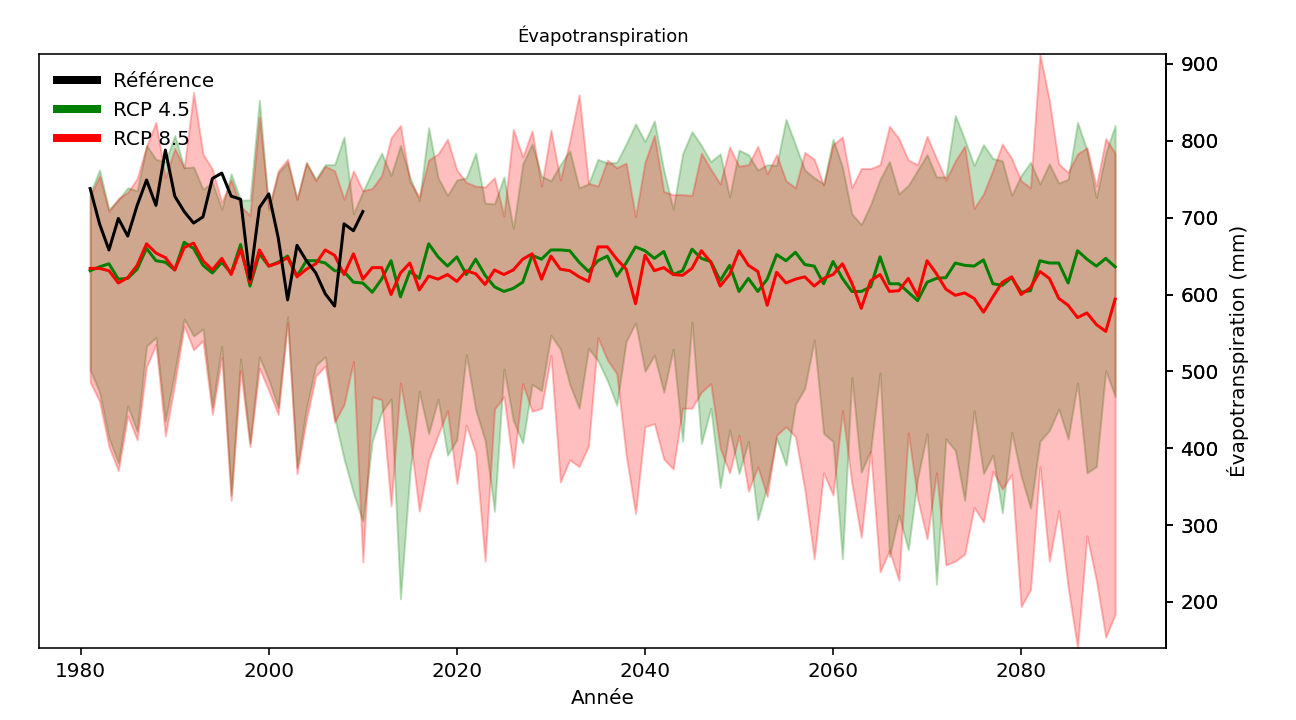
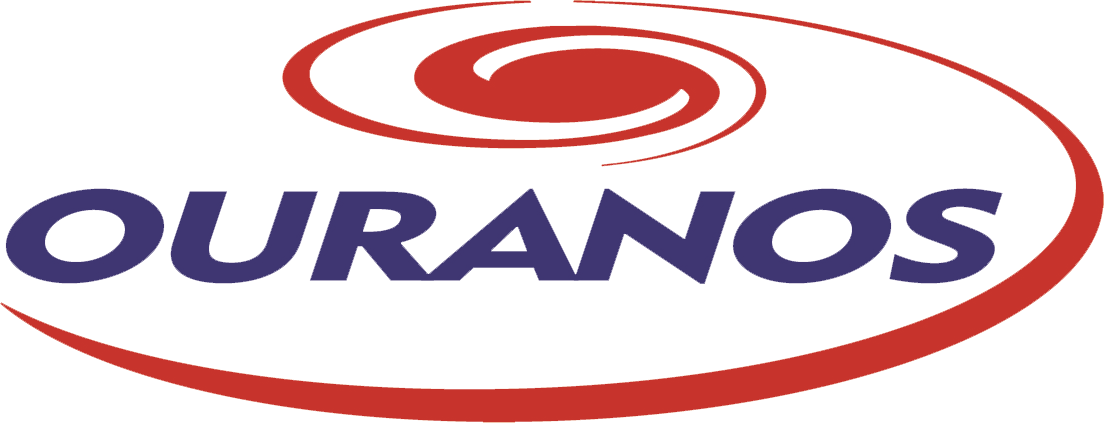

In [4]:
import logging
import os
import panel as pn
import panel.widgets as pnw
import plot
import utils
import warnings


def main():
    
    """
    Entry point.
    """

    logging.getLogger().disabled = True
    warnings.simplefilter("ignore")
    pn.extension()

    def plot_ts_update(event):
        tab_ts[0] = plot.gen_ts(vars.value, "matplotlib")
    
    def button_save_ts():
        pass

    def button_save_map():
        pass

    def button_save_stats():
        pass

    def button_clear():
        pass

    button_save_ts = pnw.Button(name='png', width=70)
    button_save_map = pnw.Button(name='png', width=70)
    button_clear = pnw.Button(name='png', width=70)

    logo_oura = pn.Column(pn.pane.PNG(utils.p_logo,height=50))

    # Variables.
    var_or_idx_list = utils.get_var_or_idx_list("ts")
    vars = pnw.Select(options=var_or_idx_list, width=450)
    vars1 = pn.Column(pn.pane.Markdown('**Variable**'), vars)
    vars1
    
    # Horizons.
    hor_list = utils.get_hor_list(vars.value)
    hors = pnw.DiscreteSlider(options=hor_list, value=hor_list[0], width=175, value_throttled=True, tooltips=True)
    hors1 = pn.Column(pn.pane.Markdown('**Horizon**'), hors)

    # RCP.
    rcp_list = utils.get_rcp_list(var_or_idx_list[0], "ts")
    rcps = pnw.RadioButtonGroup(options=rcp_list, value=rcp_list[0], width=225)
    rcps1 = pn.Column(pn.pane.Markdown("**Scénario d'émissions**"),rcps)

    delta = pnw.Checkbox(value=False)
    delta1 = pn.Row(pn.pane.Markdown('**Afficher Δ**'), delta)

    # Latitude and longitude ranges.
    # TODO: Detect automatically.
    lat_range = (12.0, 14.5)
    lon_range = (-17.5, -11.0)
    lats = pnw.FloatInput(name='Latitude', value=None, step=0.10, start=lat_range[0], end=lat_range[1], width=100)
    lats.value = None
    lons = pnw.FloatInput(name='Longitude', value=None, step=0.10, start=lon_range[0], end=lon_range[1], width=100)
    lons.value = None
    lons1 = pn.Column(pn.pane.Markdown('**Coordonnées**'),lons)

    xclim_title = "## Informations et méthodologie"    
    xclim_desc = f"Les calculs de variables et indices climatiques ont été effectués en utilisant la librairie python \
      <a href='https://xclim.readthedocs.io/en/stable/' target='_blank'>**xclim**</a> \
      et sont résumés dans les tableaux. Les données sources pour les calculs de projections futurs correspondent à l'ensemble \
      <a href='https://www.csag.uct.ac.za/cordex-africa/' target='_blank'>**CORDEX-Afrique**</a> \
      et sont détaillés plus en détail ci-dessous. Les courbes d'observations dans les graphiques sont produites à partir des \
      données de réanalyses \
      <a href='https://www.ecmwf.int/en/era5-land' target='_blank'>**ERA5-Land**</a>."

    tab_ts = pn.Column(pn.Row(plot.gen_ts(vars.value, "matplotlib")), pn.Row(pn.Column(pn.pane.Markdown("**Sauvegarder**"), button_save_ts), pn.Spacer(width=50)))
    tab_map = pn.Column(pn.Row(pn.Column(pn.pane.Markdown("**Sauvegarder**"), button_save_map), pn.Spacer(width=50)))
    tab_tbl = pn.Column(pn.Row(pn.Column(pn.pane.Markdown("**Sauvegarder**"), button_save_stats), pn.Spacer(width=50)))
    tab_infos = pn.Column(pn.pane.Markdown(xclim_title), pn.pane.Markdown(xclim_desc), width=1200)
    
    tabs = pn.Tabs(("Séries temporelles", tab_ts),
                   ("Carte", tab_map),
                   ("Statistiques", tab_tbl),
                   ("Infos & Méthodes", tab_infos), dynamic=True)

    watch_vars = vars.param.watch(plot_ts_update, ["value"], onlychanged=True)

    controls = pn.Row(pn.Column(pn.Row(vars1),
                                pn.Row(hors1, rcps1), delta1),
                      pn.Column(lons1, lats, button_clear))

    dash = pn.Column(pn.Row(logo_oura, pn.pane.Markdown("##Sénégal FAR")), controls, tabs)
    display(dash)

    
main()

In [ ]:
# Export to html (static).
"""
fname = "./data/dashboard.html"
dash.save(fname)
"""

In [6]:
# Export to html (dynamic).
"""
from bokeh.resources import INLINE
fname = "./data/dashboard.html"
dash.save(fname, resources=INLINE, embed=True)
"""

'\nfrom bokeh.resources import INLINE\nfname = "./data/dashboard.html"\ndash.save(fname, resources=INLINE, embed=True)\n'

In [ ]:
# Declare the object as servable.
# Must comment this line (in a code cell above):
#   $ display (app).
"""
app.servable()
"""

# Install and run:
#   $ conda install dask
#   $ conda install -c bokeh jupyter_bokeh
#   $ panel serve --show scen_workflow_afr.ipynb

In [ ]:
# Create dynamic webpage (only works with nbinteract widgets).
#   $ pip install nbinteract

# The next two commands can be skipped for notebook version 5.3 and above:
#   $ jupyter nbextension enable --py --sys-prefix bqplot
#   $ jupyter nbextension enable --py --sys-prefix widgetsnbextension